In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 컬럼 수가 많으므로 요약되어 표시되지 않게 하는 함수
pd.set_option('display.max_columns', None)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

train.drop(['id'], axis = 1, inplace = True)
test.drop(['id'], axis = 1, inplace = True)

train.shape, test.shape, submission.shape

((3000, 23), (2000, 22), (2000, 2))

In [2]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
Gender                               3000 non-null object
Customer Type                        3000 non-null object
Age                                  3000 non-null int64
Type of Travel                       3000 non-null object
Class                                3000 non-null object
Flight Distance                      3000 non-null int64
Seat comfort                         3000 non-null int64
Departure/Arrival time convenient    3000 non-null int64
Food and drink                       3000 non-null int64
Gate location                        3000 non-null int64
Inflight wifi service                3000 non-null int64
Inflight entertainment               3000 non-null int64
Online support                       3000 non-null int64
Ease of Online booking               3000 non-null int64
On-board service                     3000 non-null int64
Leg room service                  

- Gender, Customer Type, Type of Travel, Class는 범주형 데이터임을 확인

In [4]:
# 결측치 확인

train.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

### 기초 통계 분석

In [5]:
train.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


### Feature 분포 시각화

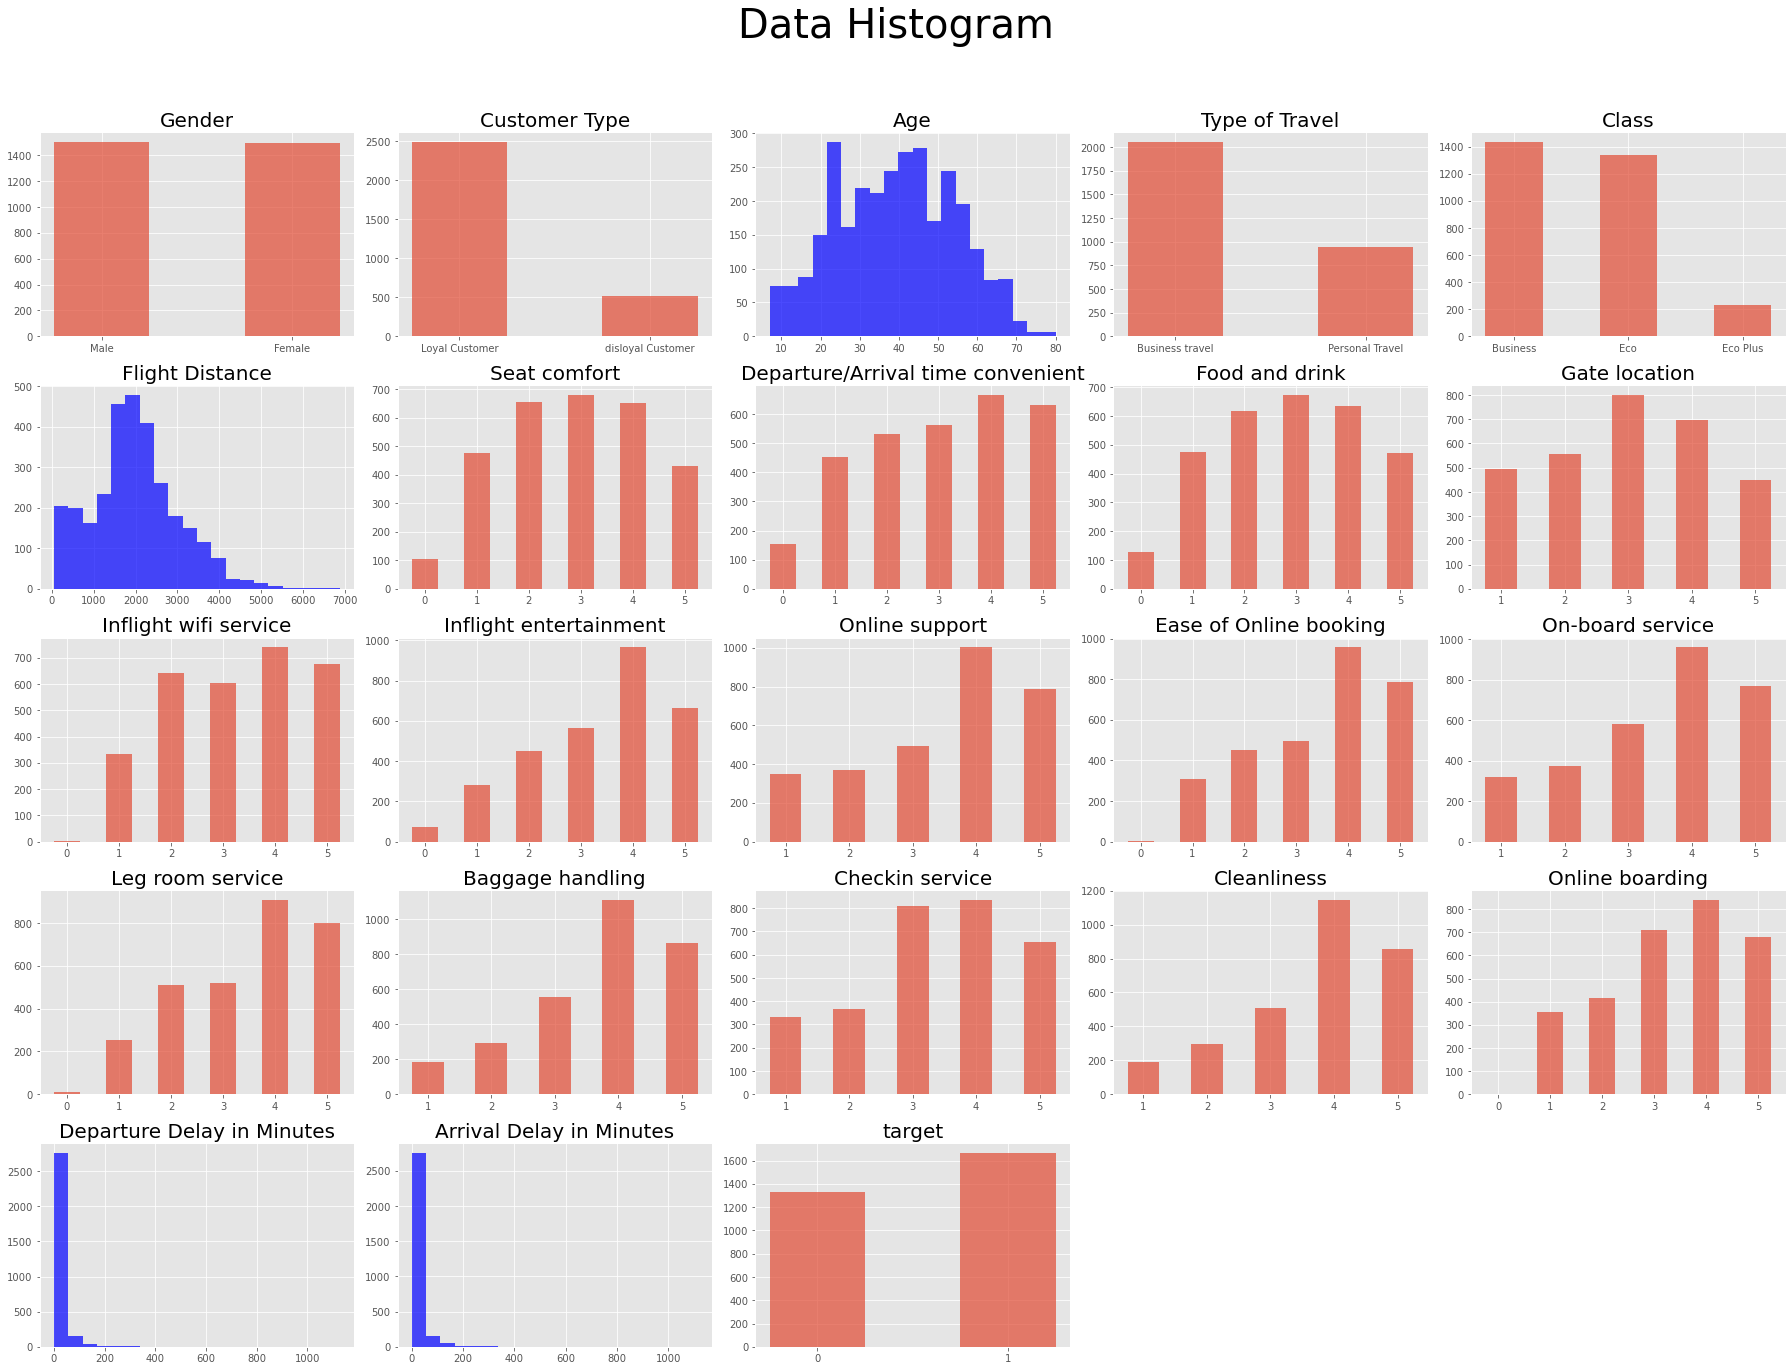

In [6]:
plt.style.use('ggplot')

plt.figure(figsize = (25, 20))
plt.suptitle('Data Histogram', fontsize = 40)

cols = train.columns
for i in range(len(cols)):
    plt.subplot(5, 5, i+1) # 최대 5 by 5, 25개의 특징 분포 확인
    plt.title(cols[i], fontsize = 20) # 각 분포그림의 제목을 특징명으로 설정
    if len(train[cols[i]].unique()) > 20: # 해당 특징의 고유한 값 종류가 20개가 넘으면
        plt.hist(train[cols[i]], bins = 20, color = 'b', alpha = 0.7) # 히스토그램을 출력, bins : 칸을 나누는 값, alpha : 투명도
        
    else:
        temp = train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width = 0.5, alpha = 0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

### target과 feature들의 관계 확인

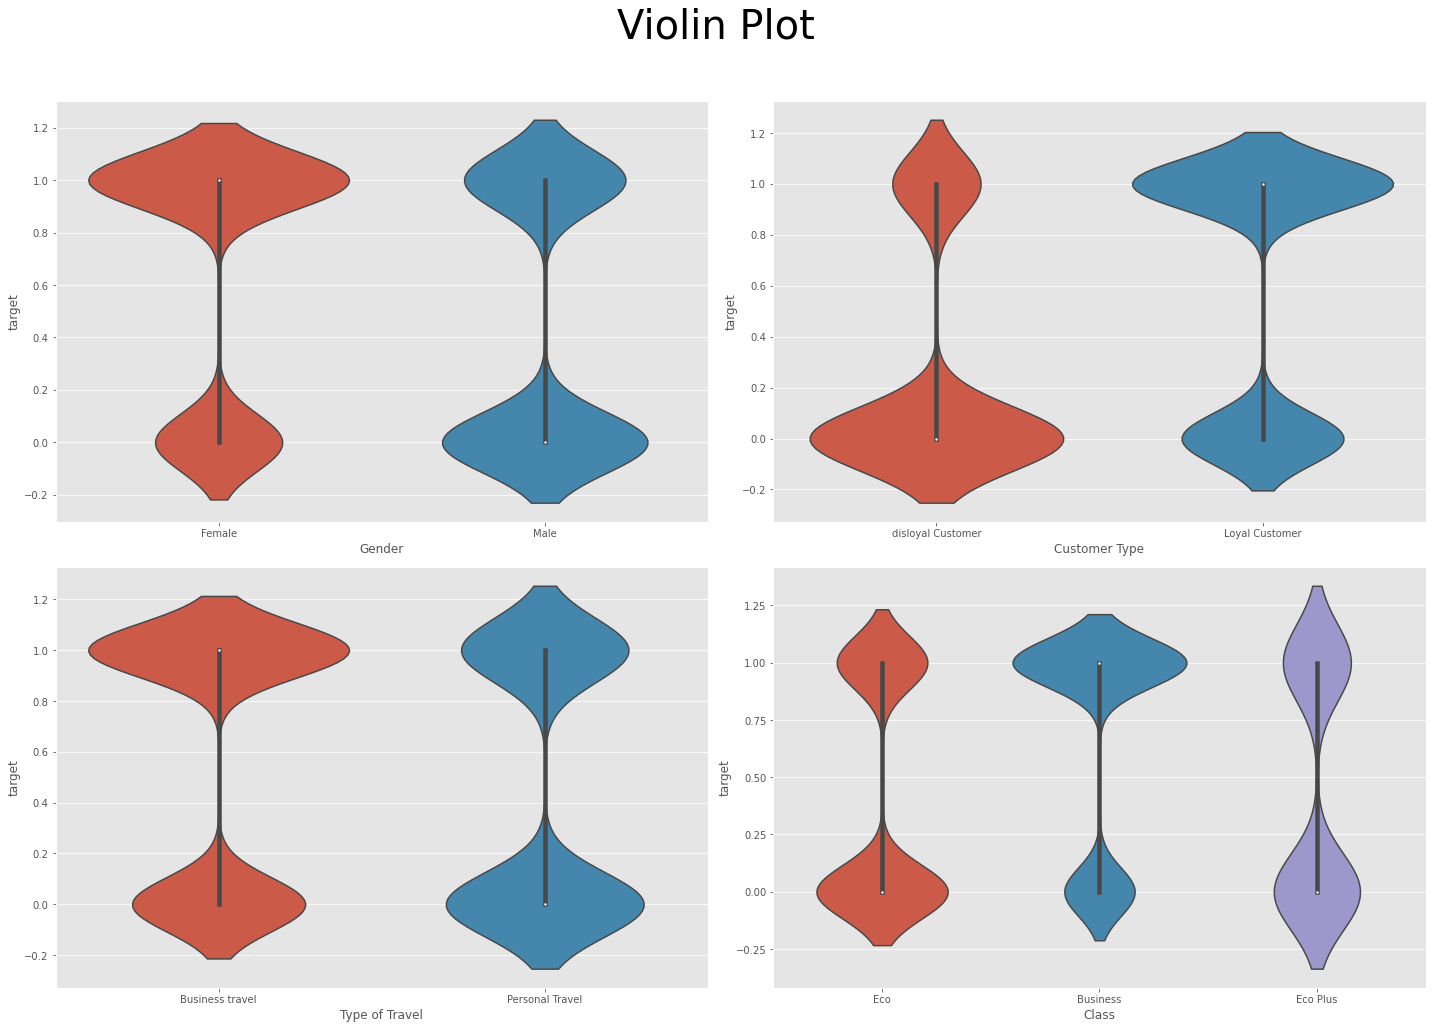

In [8]:
target = 'target'

# 범주형 데이터 분리
categorical_feature = train.columns[train.dtypes == 'object']

plt.figure(figsize = (20, 15))
plt.suptitle('Violin Plot', fontsize = 40)

for i in range(len(categorical_feature)):
    plt.subplot(2, 2, i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x = train[categorical_feature[i]], y = train[target])

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

- target은 0과 1로 이루어져 있음. y축의 0 부분과 1 부분을 집중해서 보면 됨
- gender 같은 경우는 1을 준 성별은 여성이 많고, 0을 준 성별은 남성이 많음
- Customer Type 같은 경우 disloyal과 loyal에 따라 target 값이 굉장히 차이나는 것을 볼 수 있음

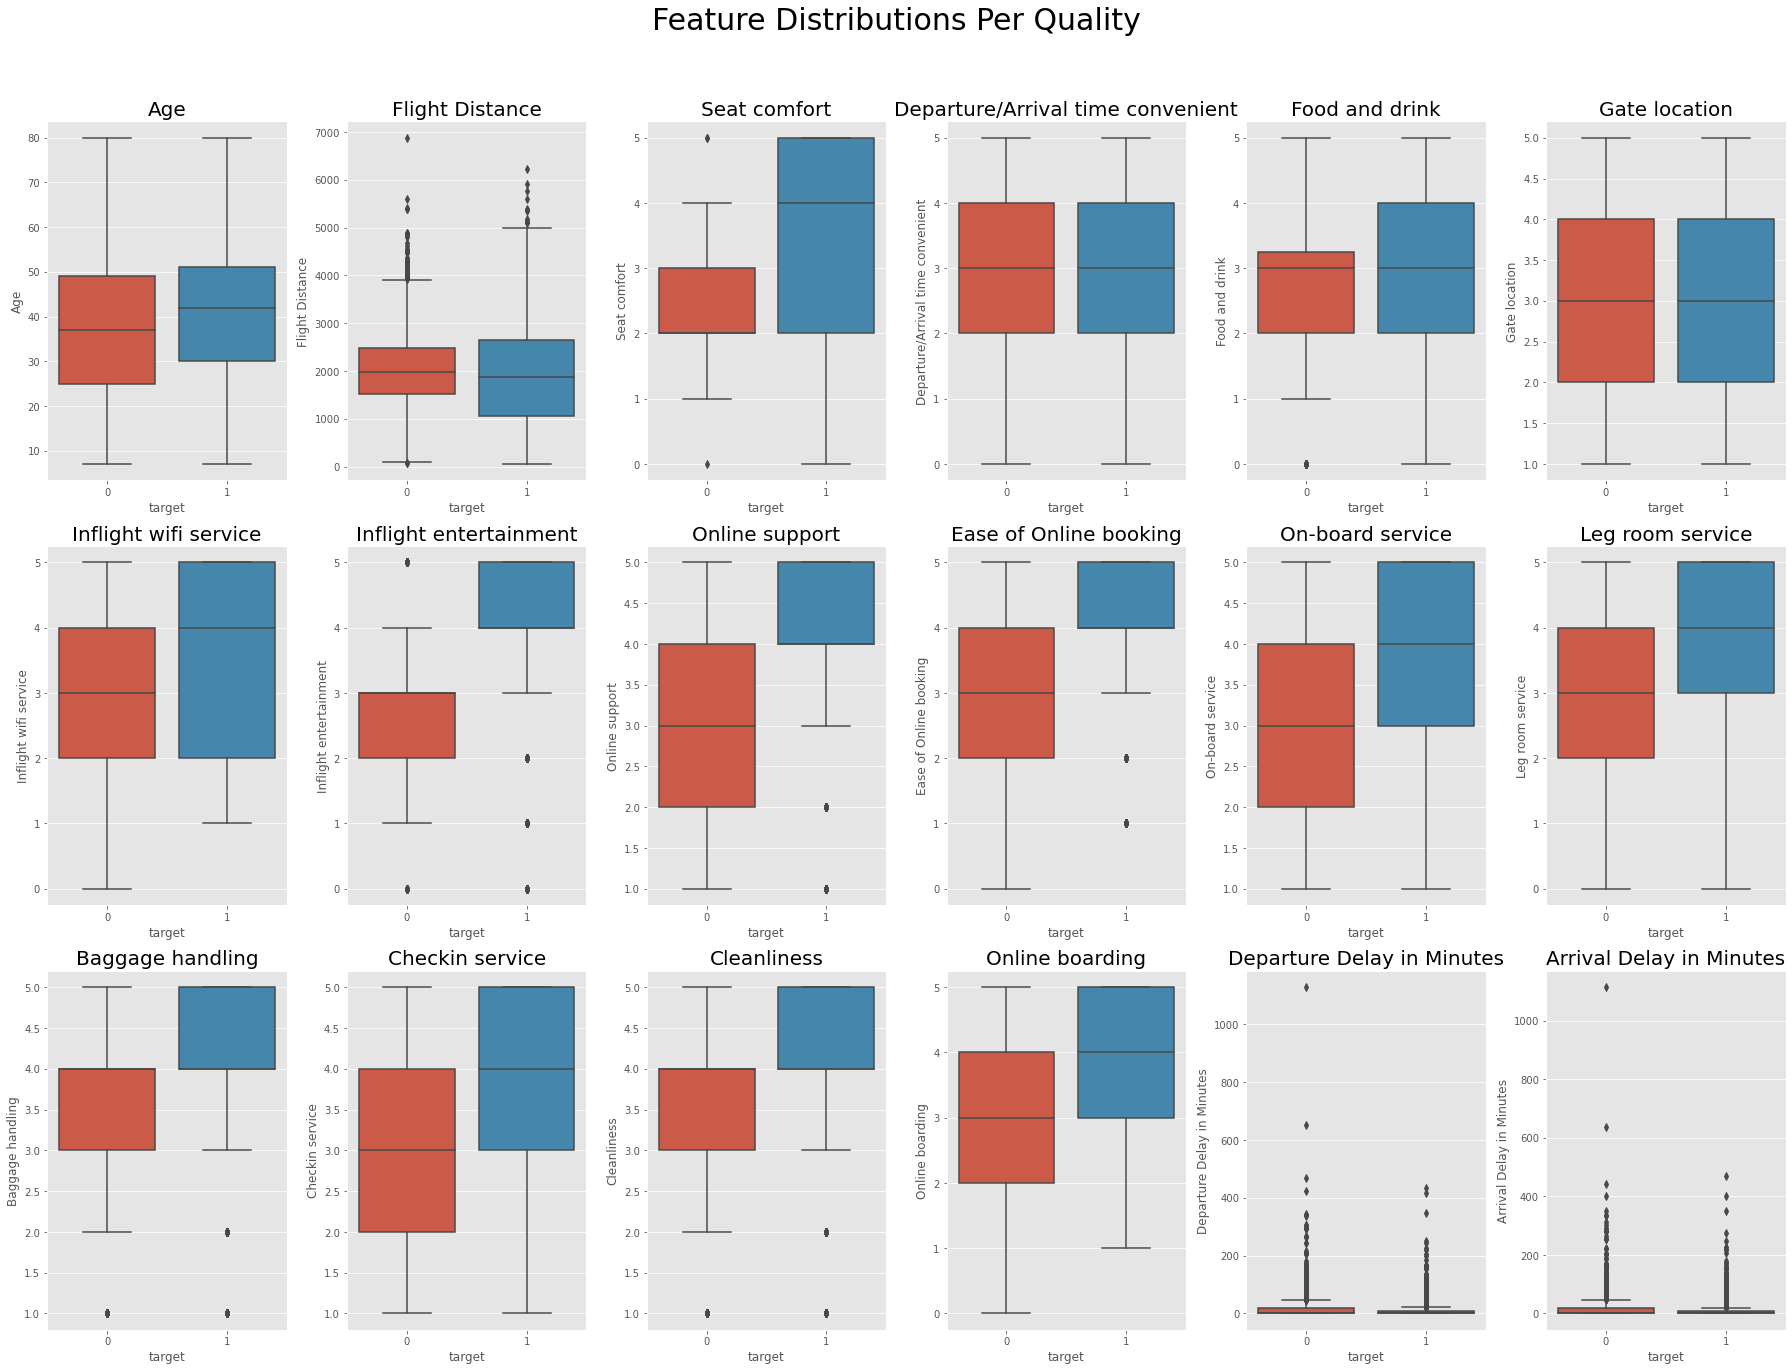

In [10]:
# 수치형 데이터 분리
numeric_feature = train.columns[(train.dtypes == 'int64') | (train.dtypes == 'float')]
num_data = train[numeric_feature]

# 박스 플롯
fig, axes = plt.subplots(3, 6, figsize = (25, 20))

fig.suptitle('Feature Distributions Per Quality', fontsize = 30)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x = 'target', y = col, ax = ax, data = num_data)
    ax.set_title(col, fontsize = 20)

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

### 상관계수 확인

#### 범주형 데이터 숫자화

In [13]:
from sklearn.preprocessing import LabelEncoder

corr_df = train.copy()
corr_df[corr_df.columns[corr_df.dtypes == 'O']] = corr_df[corr_df.columns[corr_df.dtypes == 'O']].astype(str).apply(LabelEncoder().fit_transform)

#### Heatmap을 활용하여 시각화

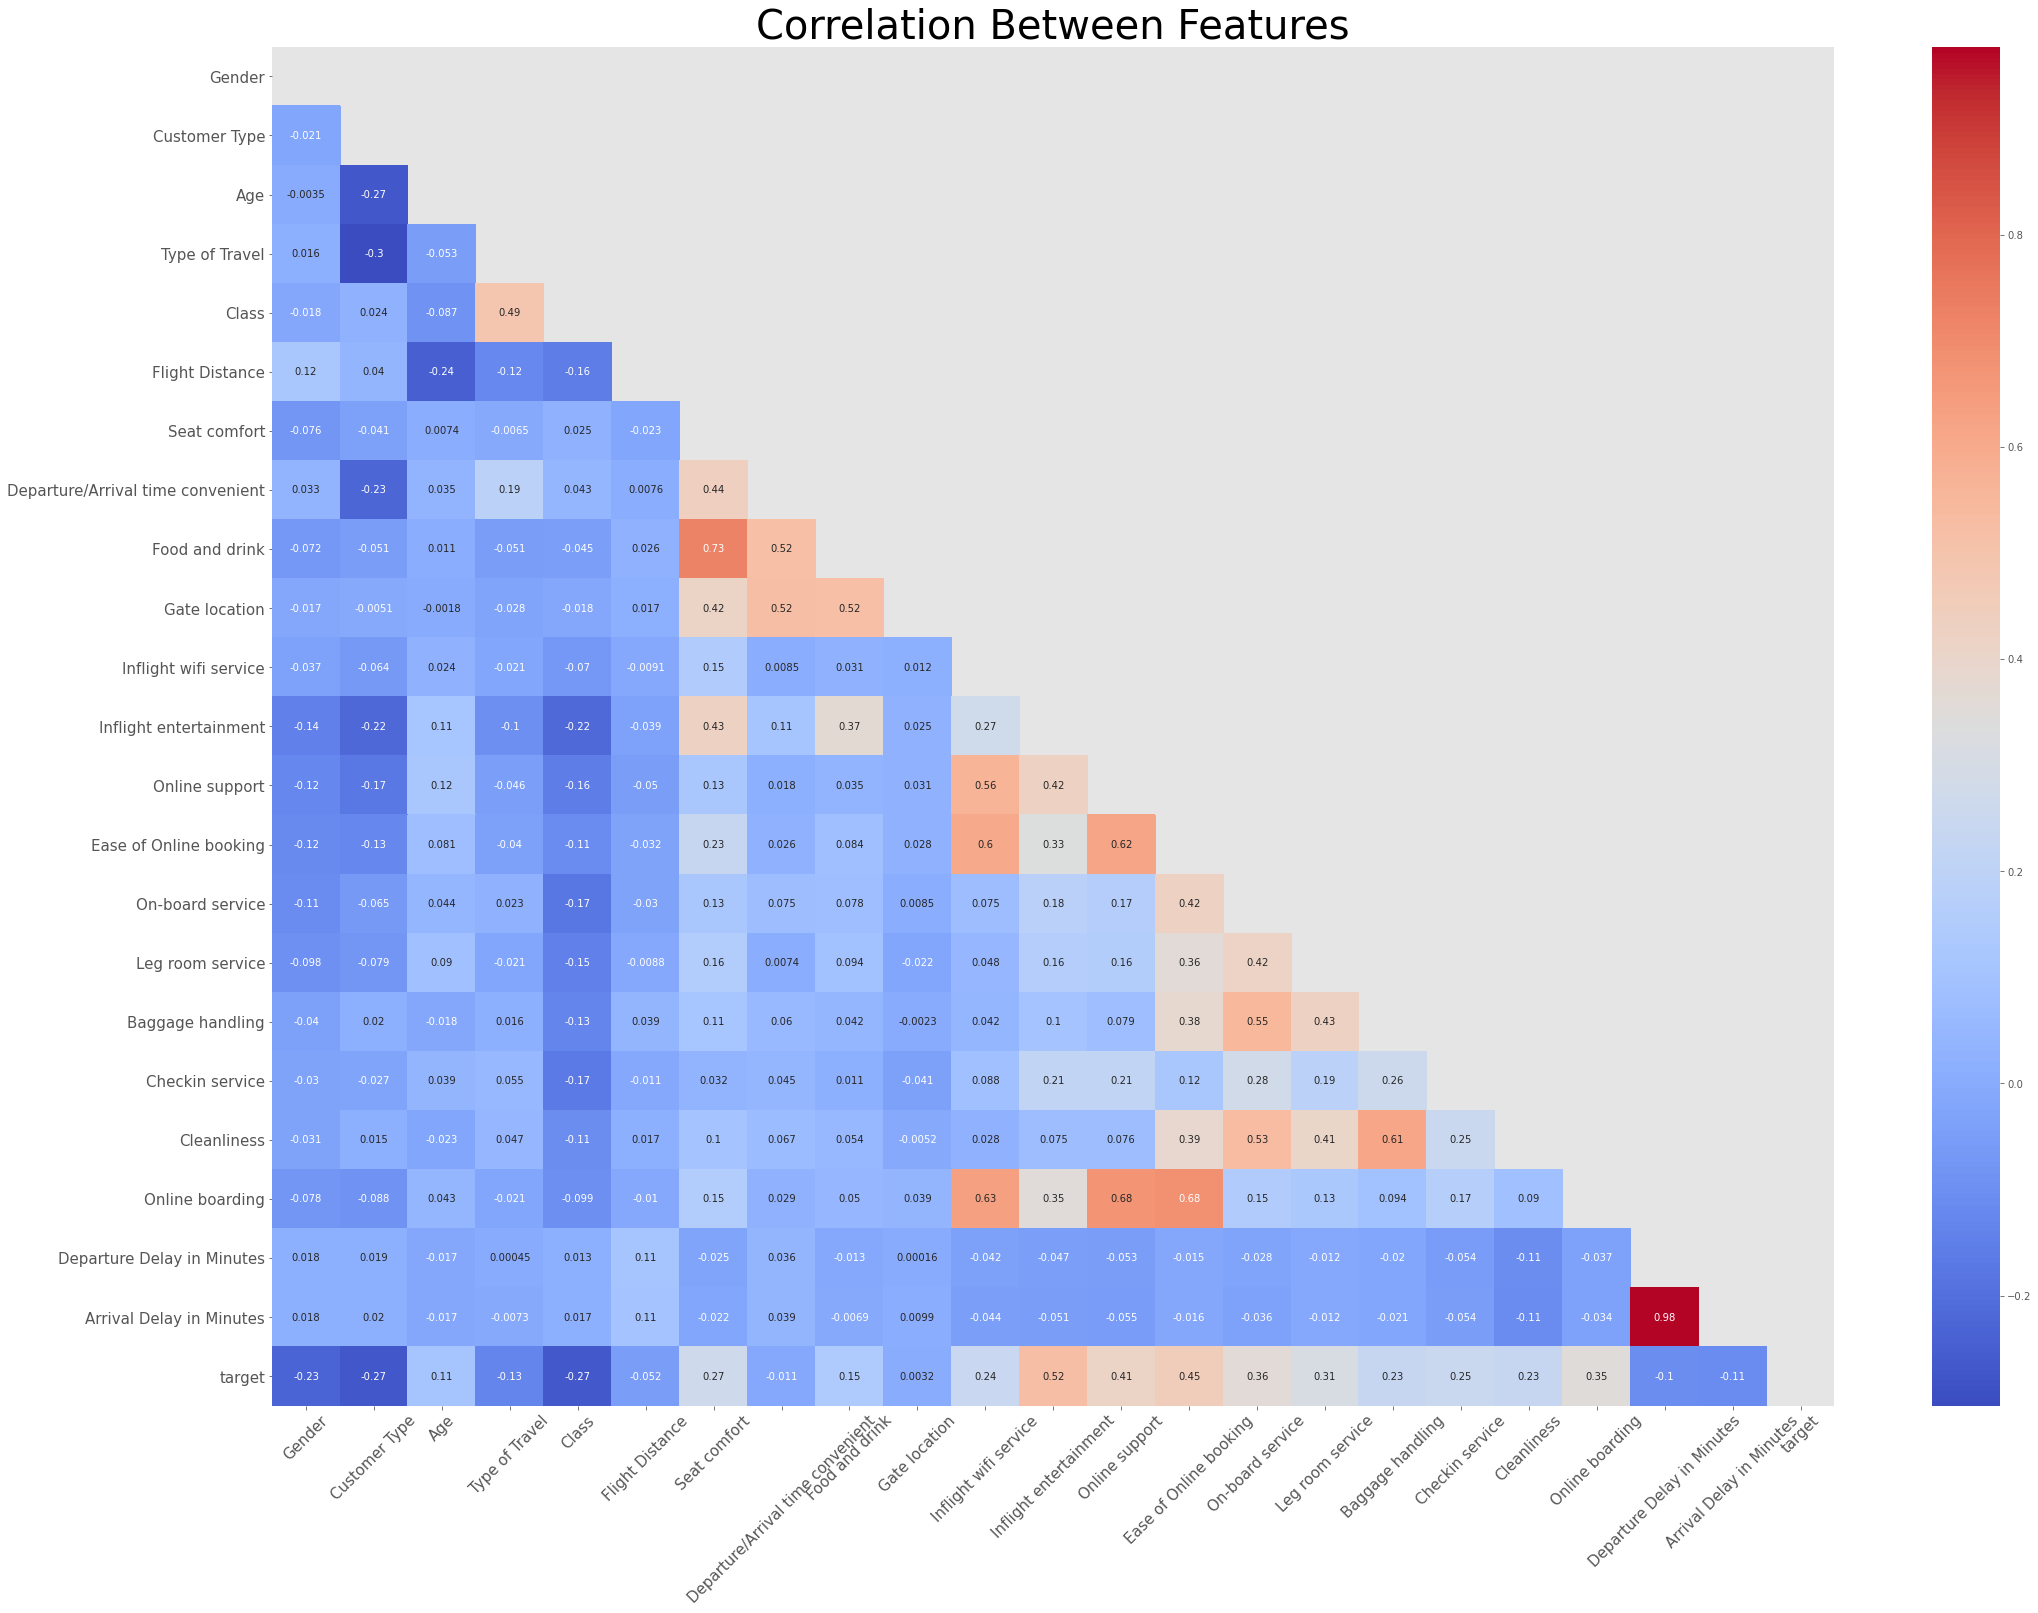

In [14]:
plt.figure(figsize = (35, 25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot = True, mask = mask, cmap = 'coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize = 15, rotation = 45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize = 15)
plt.title('Correlation Between Features', fontsize = 40)
plt.show()

- 상관계수의 값이 낮다고 해서 상관계수가 안좋은게 아니라 절댓값을 봐야한다. 즉, 남색에 가까운게 안좋은게 아니라 0에 가까운 Departure Delay in Minutes & Gate location의 색이 상관계수가 낮은 것이라고 보면 된다.
- target을 기준으로 확인했을 때, 위에서 본 대로 age, Departure/Arrival time convenient, Gate location의 상관계수가 낮은 것을 확인 할 수 있음
- 반대로 Inflight entertainment와 Online support, Ease of Online booking 등등이 높은 상관계수를 보임

### Departure Delay in Minutes & Arrival Delay in Minutes

- 출발 시간이 지연되면 당연히 도착시간도 지연됨. 상관계수는 0.98로 매우 높은 상관계수를 가진다. 과연 이것이 좋은 값일까?
- 관련 키워드는 다중 공선성이다. 독립변수 즉, target이 아닌 특징들에 대하여 서로 독립적인 관계여야 한다.
- 하지만 위의 두 특징은 서로 독립적인 관계가 아니고 거의 하나로 움직이게 되는데 주로 상관계수가 0.7 이상일 때 다중 공선성이 나타난다고 함
- 0.7 이상의 특징 쌍이 하나 더 보인다. 'Food and drink' & 'Seat comfort' 이다. 좌석의 편리성과 음식 관계는 아무래도 비싼 좌석일 수록 자리가 편하고 이에 따라 음식도 잘 나오므로 높게 나타난 것으로 추정됨

- 다중 공선성의 처리 방법 중 가장 간단한 방법은 둘 중 한 특징을 제거하는 것이다. 2개의 쌍 중 target과의 상관계수가 낮은 특징을 제거한다.

1. Departure Delay in Minutes & Arrival Delay in Minutes (target과의 상관관계 : 0.1 / 0.11)
- Departure Delay in Minutes 제거(0.1)

2. Food and drink & Seat comfort (target과의 상관관계 : 0.15 / 0.27)
- Food and drink 제거(0.15)

In [15]:
train.drop('Departure Delay in Minutes', axis = 1, inplace = True)
train.drop('Food and drink', axis = 1, inplace = True)

test.drop('Departure Delay in Minutes', axis = 1, inplace = True)
test.drop('Food and drink', axis = 1, inplace = True)

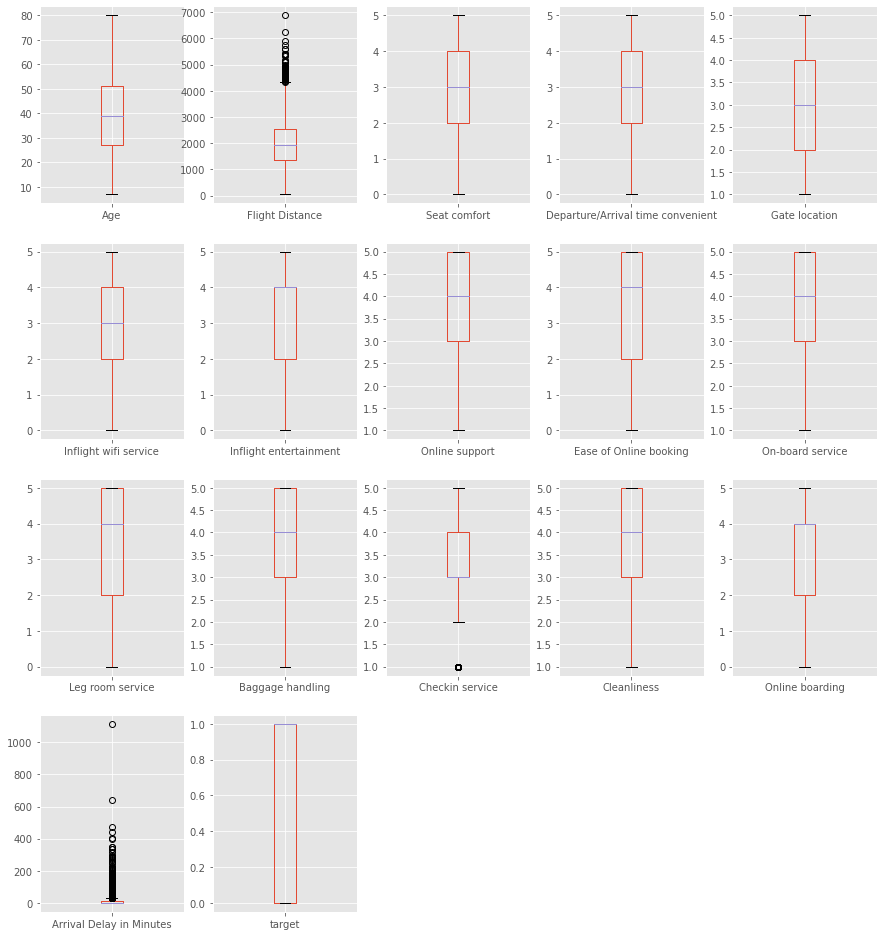

In [16]:
train.plot(kind = 'box', subplots = True, layout = (5, 5), figsize = (15, 21))
plt.show()

- 출발/도착 지연시간과 비행시간에 대해서 이상치가 매우 많음

In [17]:
# 이상치 제거

def outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [18]:
ArrivalDelay_index_data = outliers(train['Arrival Delay in Minutes'])[0]
FlightDistance_index_data = outliers(train['Flight Distance'])[0]
CheckinService_index_data = outliers(train['Checkin service'])[0]

In [19]:
ArrivalDelay_index_data

array([   6,   23,   30,   35,   36,   51,   57,   59,   62,   66,   78,
         82,   85,   92,  116,  134,  137,  151,  160,  162,  175,  180,
        198,  202,  206,  214,  245,  255,  258,  279,  283,  285,  290,
        292,  303,  309,  315,  325,  335,  340,  341,  349,  359,  368,
        373,  375,  377,  385,  391,  394,  416,  428,  429,  435,  454,
        457,  472,  483,  484,  490,  510,  511,  517,  522,  537,  539,
        573,  575,  587,  592,  599,  604,  620,  621,  623,  627,  638,
        641,  650,  652,  653,  670,  672,  676,  693,  695,  696,  703,
        707,  715,  721,  723,  737,  752,  763,  766,  773,  774,  783,
        792,  797,  798,  799,  809,  810,  824,  837,  846,  852,  858,
        862,  869,  883,  884,  895,  904,  906,  912,  923,  937,  947,
        948,  949,  962,  968,  978,  983,  987,  993, 1001, 1002, 1013,
       1014, 1020, 1027, 1031, 1034, 1044, 1065, 1068, 1069, 1073, 1074,
       1098, 1103, 1116, 1122, 1140, 1151, 1152, 11

- 행 자체를 삭제하려고 보니 이상치가 포함된 행이 너무 많아 학습에 지장이 생길 듯함. 제거가 아닌 평균값으로 대치함.

In [20]:
train.loc[ArrivalDelay_index_data, 'Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].mean()
train.loc[FlightDistance_index_data, 'Flight Distance'] = train['Flight Distance'].mean()
train.loc[CheckinService_index_data, 'Checkin service'] = train['Checkin service'].mean()

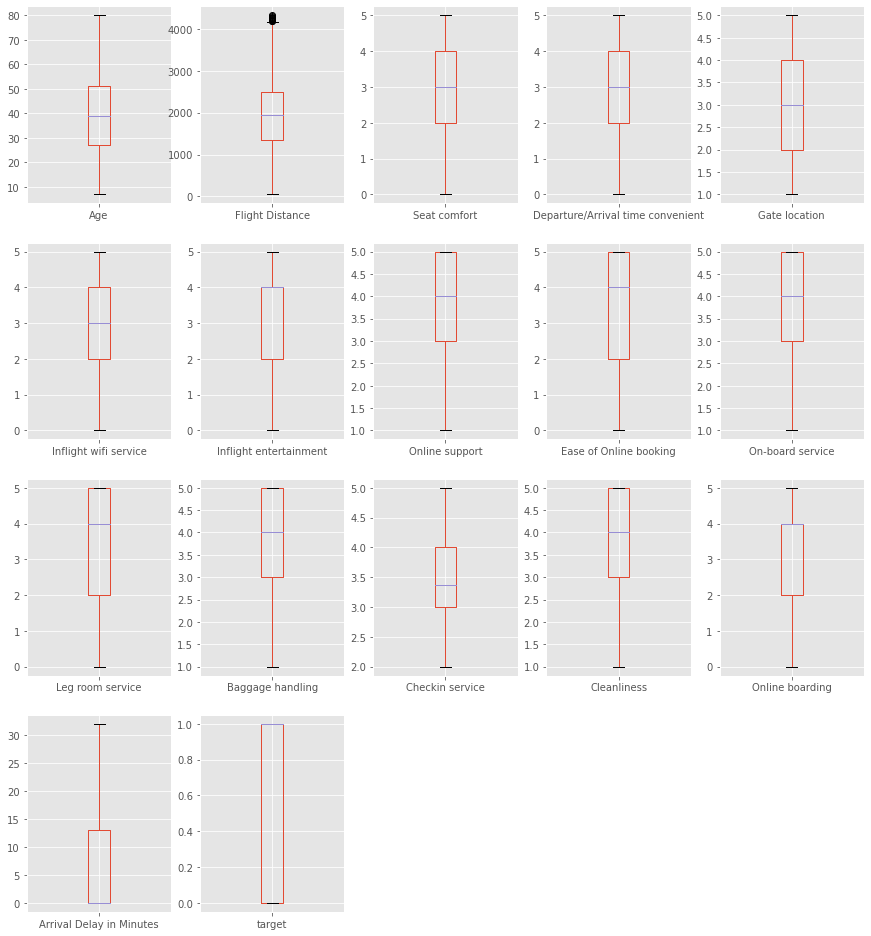

In [21]:
train.plot(kind = 'box', subplots = True, layout = (5, 5), figsize = (15, 21))
plt.show()